### Imports

In [1]:
import os
import pandas as pd
import warnings
from PIL import Image

warnings.filterwarnings('ignore')

### Load data

In [2]:
os.chdir('..')

In [3]:
# 'test_results'
experiment_name = input('Provide the name of the experiment folder')

In [4]:
evaluation_file = f'data/results/{experiment_name}/evaluation.tsv'

In [5]:
results = pd.read_csv(evaluation_file, sep='\t')

In [6]:
results.head()

,prompt_id,image_id,clip_score,user_prompt,optimized_prompt,caption,image_path,img_sim_score,spice_score,terminated,best_image
0,34,0,0.826532,A red stop sign on the side of a brick road.,A red stop sign on the side of a brick road.,there are two red square signs on the ground n...,data/results/full_experiment_V1_coco/000034/im...,0.405350,0.235294,0,0
1,34,1,0.864084,A red stop sign on the side of a brick road.,A red stop sign standing on a brick pavement w...,there is a stop sign on the side of the road,data/results/full_experiment_V1_coco/000034/im...,0.393917,0.714286,1,1
2,34,2,0.952629,A red stop sign on the side of a brick road.,An iconic red stop sign standing tall on a rus...,there is a stop sign on the side of the road,data/results/full_experiment_V1_coco/000034/im...,0.425009,0.714286,0,0
3,34,3,0.949218,A red stop sign on the side of a brick road.,A bright red stop sign standing out against a ...,there is a stop sign on the side of a brick bu...,data/results/full_experiment_V1_coco/000034/im...,0.412657,0.533333,0,0
4,34,4,0.848132,A red stop sign on the side of a brick road.,A red stop sign on a brick road next to buildi...,there is a stop sign that is on the side of th...,data/results/full_experiment_V1_coco/000034/im...,0.427140,0.615385,0,0


In [17]:
# Define columns with scores
scores = ['clip_score','spice_score','img_sim_score']
# scores = ['clip_score','spice_score'] # for parti prompts results

### Results

In [51]:
#prompt_num = results['prompt_id'].nunique()
#optimization_step_num = results.groupby(['prompt_id'])['image_id'].count().max()

#### Average scores

In [15]:
# Average scores for all prompts
results.groupby(by='image_id')[scores].mean()

,clip_score,spice_score,img_sim_score,image_id
image_id,,,,
0,0.817939,0.286818,0.565164,0.0
1,0.765248,0.265352,0.547699,1.0
2,0.759039,0.262528,0.545941,2.0
3,0.752537,0.248654,0.543575,3.0
4,0.724840,0.230924,0.519027,4.0
5,0.759396,0.027562,0.538030,5.0


#### Average scores per prompt

In [18]:
# Average scores per prompt
results.groupby(['prompt_id','user_prompt'])[scores].mean()

,,clip_score,spice_score,img_sim_score
prompt_id,user_prompt,,,
0,A woman walking across a street holding a pink umbrella.,0.934808,0.314413,0.592464
1,Cat sitting next to remote control on small counter.,0.813392,0.266874,0.570686
2,A couple of children sitting down on a white wall.,0.648331,0.000000,0.393478
3,A white refrigerator and a counter in a room.,0.608867,0.147863,0.656004
4,a close up of a cat on a rug on the ground,0.791514,0.220118,0.588951
5,A herd of elephants walking down a dirt road.,0.837431,0.368224,0.741519
6,A man holding a slice of pizza while wearing glasses.,0.864318,0.142063,0.423401
7,A large sleigh bed in a hotel room.,0.767057,0.199878,0.680167
8,a person holding an open umbrella with words written on it,0.689551,0.140171,0.409185


#### Early stopping

In [20]:
# Percentage of prompts that were stopped
results.groupby(['prompt_id'])['terminated'].max().mean()

0.78

In [21]:
# Most often terminations step based on best image
results[results['terminated'] == True]['image_id'].value_counts().sort_values(ascending=False)

image_id
0    19
1     9
2     7
3     3
4     1
Name: count, dtype: int64

In [22]:
# Average termination step for based image
results[results['terminated'] == True]['image_id'].mean()

0.9230769230769231

In [23]:
# Average scores for stopped prompts
results[results['terminated'] == True][scores].mean()

clip_score       0.830490
spice_score      0.399771
img_sim_score    0.563393
dtype: float64

#### Best Image

In [24]:
# Most often terminations step based on best image
results[results['best_image'] == True]['image_id'].value_counts().sort_values(ascending=False)

image_id
1    14
0    13
2     9
3     9
4     4
5     1
Name: count, dtype: int64

In [25]:
# Average termination step for based image
results[results['best_image'] == True]['image_id'].mean()

1.6

In [26]:
# Average scores for best image
results[results['best_image'] == True][scores].mean()

clip_score       0.812913
spice_score      0.365158
img_sim_score    0.553264
dtype: float64

Iteration: 1
scores (clip, spice, img_sim): 0.9075292944908142 0.923076923076923 0.6237217783927917
TERMINATED at this step
BEST IMAGE according to LLM
Original prompt: Three pots of flowers are placed on a window sill.
Generated image:


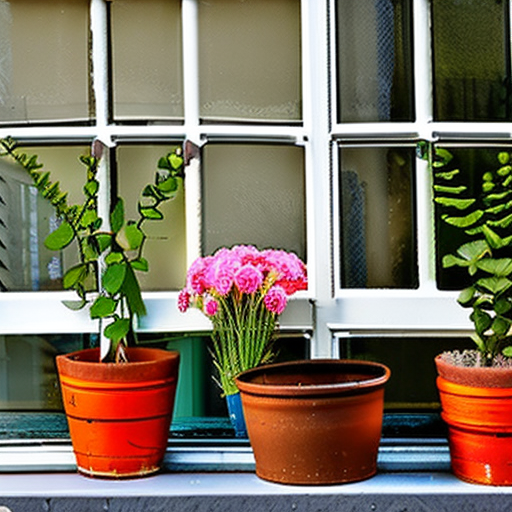

Caption: there are three pots of flowers sitting on a window sill
#################################################################################
Iteration: 2
scores (clip, spice, img_sim): 0.7304268479347229 0.1538461538461538 0.5819088220596313
Optimized prompt: A variety of colorful flowers arranged beautifully on a sunlit window sill.
Generated image:


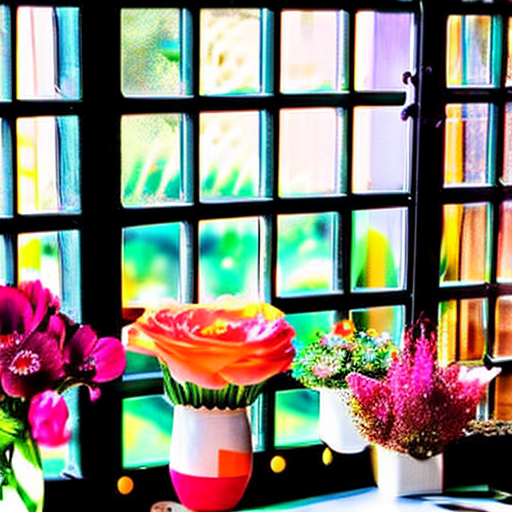

Caption: there are many different flowers in vases on a table
#################################################################################
Iteration: 3
scores (clip, spice, img_sim): 0.6337651610374451 0.3076923076923076 0.6233248710632324
Optimized prompt: A trio of potted daisies sit atop a sunlit windowsill.
Generated image:


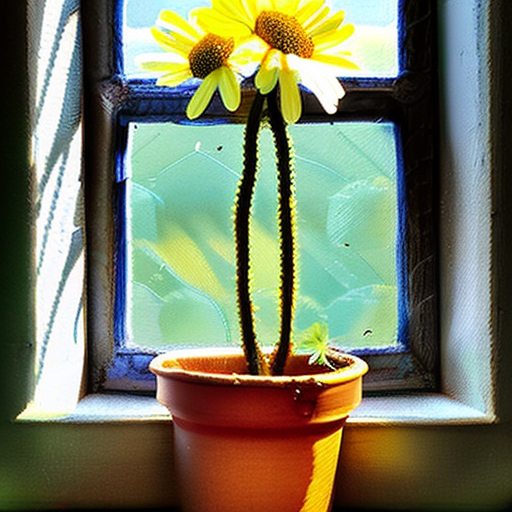

Caption: there is a yellow flower in a pot sitting in front of a window
#################################################################################
Iteration: 4
scores (clip, spice, img_sim): 0.9147133827209472 0.4285714285714285 0.6613701581954956
Optimized prompt: A row of vibrant flowers decorate a windowsill.
Generated image:


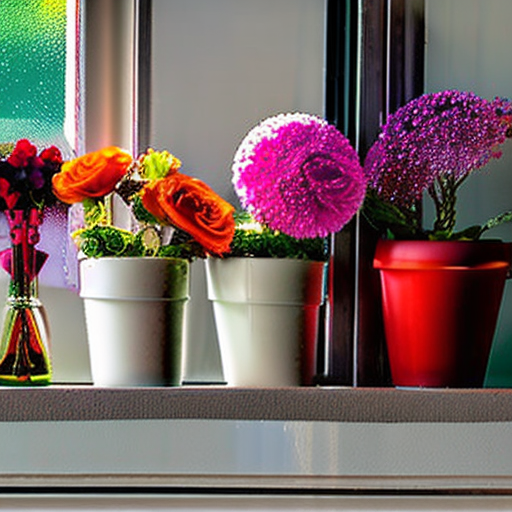

Caption: there are many different flowers in vases on a window sill
#################################################################################
Iteration: 5
scores (clip, spice, img_sim): 0.7939425110816956 0.4 0.5272581577301025
Optimized prompt: A trio of potted red roses adorn a sunny window ledge.
Generated image:


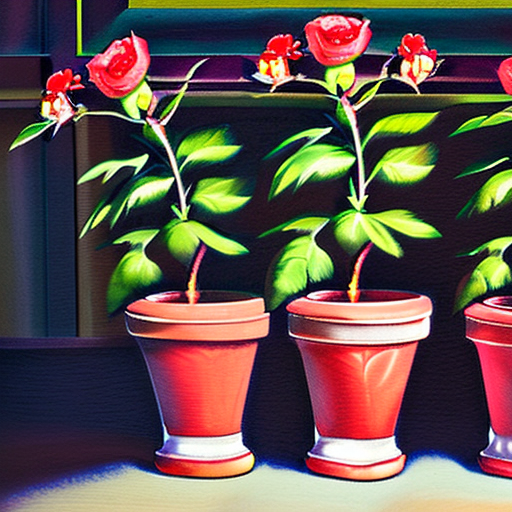

Caption: painting of three pots with flowers in front of a window
#################################################################################
Iteration: 6
scores (clip, spice, img_sim): 0.8718344569206238 0.0 0.6379781365394592
Optimized prompt: A view of three vibrant flower pots on a windowsill, basking in sunlight.
Generated image:


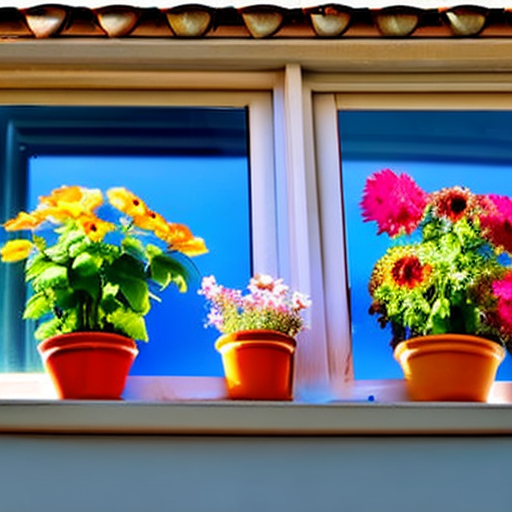

Caption: nan
#################################################################################


In [32]:
prompt_id = int(input("Provide prompt_id"))
for idx, row in results[results['prompt_id'] == prompt_id].reset_index().iterrows():
    print('Iteration:', idx + 1)
    print('scores (clip, spice, img_sim):', row['clip_score'], row['spice_score'], row['img_sim_score'])
    if row['terminated'] == 1:
        print('TERMINATED at this step')
    if row['best_image'] == 1:
        print('BEST IMAGE according to LLM')
    if idx == 0:
        print('Original prompt:', row['optimized_prompt'])
    else:
        print('Optimized prompt:', row['optimized_prompt'])
    print('Generated image:')
    image = Image.open(row['image_path'])
    display(image)
    print('Caption:', row['caption'])
    print('#################################################################################')